In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('epa_air_quality_annual_summary.csv')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(2038710, 55)

In [4]:
df.columns

Index(['state_code', 'county_code', 'site_num', 'parameter_code', 'poc',
       'latitude', 'longitude', 'datum', 'parameter_name', 'sample_duration',
       'pollutant_standard', 'metric_used', 'method_name', 'year',
       'units_of_measure', 'event_type', 'observation_count',
       'observation_percent', 'completeness_indicator', 'valid_day_count',
       'required_day_count', 'exceptional_data_count', 'null_data_count',
       'primary_exceedance_count', 'secondary_exceedance_count',
       'certification_indicator', 'num_obs_below_mdl', 'arithmetic_mean',
       'arithmetic_standard_dev', 'first_max_value', 'first_max_datetime',
       'second_max_value', 'second_max_datetime', 'third_max_value',
       'third_max_datetime', 'fourth_max_value', 'fourth_max_datetime',
       'first_max_non_overlapping_value', 'first_no_max_datetime',
       'second_max_non_overlapping_value', 'second_no_max_datetime',
       'ninety_nine_percentile', 'ninety_eight_percentile',
       'ninety_five_

In [5]:
df.size

112129050

In [6]:
df.dropna().shape

(490, 55)

In [7]:
df[['state_code','longitude','first_max_value']].describe() #columns info

,longitude,first_max_value
count,2.038700e+06,2.038688e+06
mean,-9.459847e+01,9.029162e+01
std,1.742724e+01,8.176460e+02
min,-1.629680e+02,-4.150000e+02
25%,-1.093824e+02,9.900000e-02
50%,-9.058761e+01,2.745090e+00
75%,-8.137301e+01,3.630000e+01
max,1.448333e+02,3.365830e+05


In [8]:
df.state_code.dtype  #'o'=object

dtype('O')

In [9]:
df.first_max_value.dtype #32, 64 based on computer

dtype('float64')

In [10]:
#scientific notation

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [12]:
#which state has the highest valid day count?

In [13]:
df[['year']].describe() #columns info

,year
count,2038710.000
mean,2003.136
std,9.105
min,1980.000
25%,1998.000
50%,2005.000
75%,2010.000
max,2017.000


In [14]:
#df[['year','poc']].sort_values(by='year',ascending=True)

In [15]:
#df.columns

In [16]:
df1=df[['state_name','city_name','year','parameter_name','sample_duration','arithmetic_mean','arithmetic_standard_dev']].sort_values(by='year',ascending=True)

In [17]:
df1.head()

,state_name,city_name,year,parameter_name,sample_duration,arithmetic_mean,arithmetic_standard_dev
1680470,Wisconsin,Not in a city,1980,Wind Direction - Scalar,1 HOUR,201.722,99.416
1106871,Kentucky,Louisville,1980,Lead (TSP) STP,COMPOSITE DATA,0.962,0.631
1106873,Ohio,Akron,1980,Nickel (TSP) STP,24 HOUR,0.006,0.005
319119,South Carolina,Sans Souci,1980,Copper (TSP) STP,24 HOUR,0.150,0.073
629574,New York,Niagara Falls,1980,Chromium (TSP) STP,24 HOUR,0.014,0.012


In [18]:
georgia = df1[df1.state_name == 'Georgia']
georgia1 = georgia[['city_name', 'year', 'arithmetic_mean']].reset_index()
print(georgia1)

         index                            city_name  year  arithmetic_mean
0       387391                              Atlanta  1980           12.018
1      1964271                             Savannah  1980            9.801
2       910351  Augusta-Richmond County (Remainder)  1980           60.714
3      1100776                                Macon  1980           18.923
4       139198                        Not in a city  1980            4.943
5       138066                                Macon  1980           62.459
6        23873                              Conyers  1980            0.035
7      1625140                              Conyers  1980            0.035
8       135314                        Not in a city  1980           50.273
9      1644125                              Atlanta  1980            0.729
10      541627                              Augusta  1980            6.441
11     1646823                              Atlanta  1980           31.131
12      137004           

In [19]:
city_mean = georgia.groupby(['city_name','year']).mean().sort_values('arithmetic_mean', ascending=False).reset_index()

In [20]:
print(city_mean)

                                    city_name  year  arithmetic_mean  \
0                                 Gainesville  1999          354.593   
1                               Warner Robins  2000          299.134   
2                                 Garden City  2000          298.736   
3                                 Garden City  2002          298.136   
4                                    Valdosta  2000          297.286   
5                                 Garden City  2001          297.227   
6                                 Garden City  2004          297.096   
7                                 Garden City  2003          296.736   
8                                      Gordon  2000          296.726   
9                                      Gordon  2002          296.567   
10                                Garden City  2006          296.464   
11                                     Gordon  2005          296.175   
12                                     Gordon  2004          296

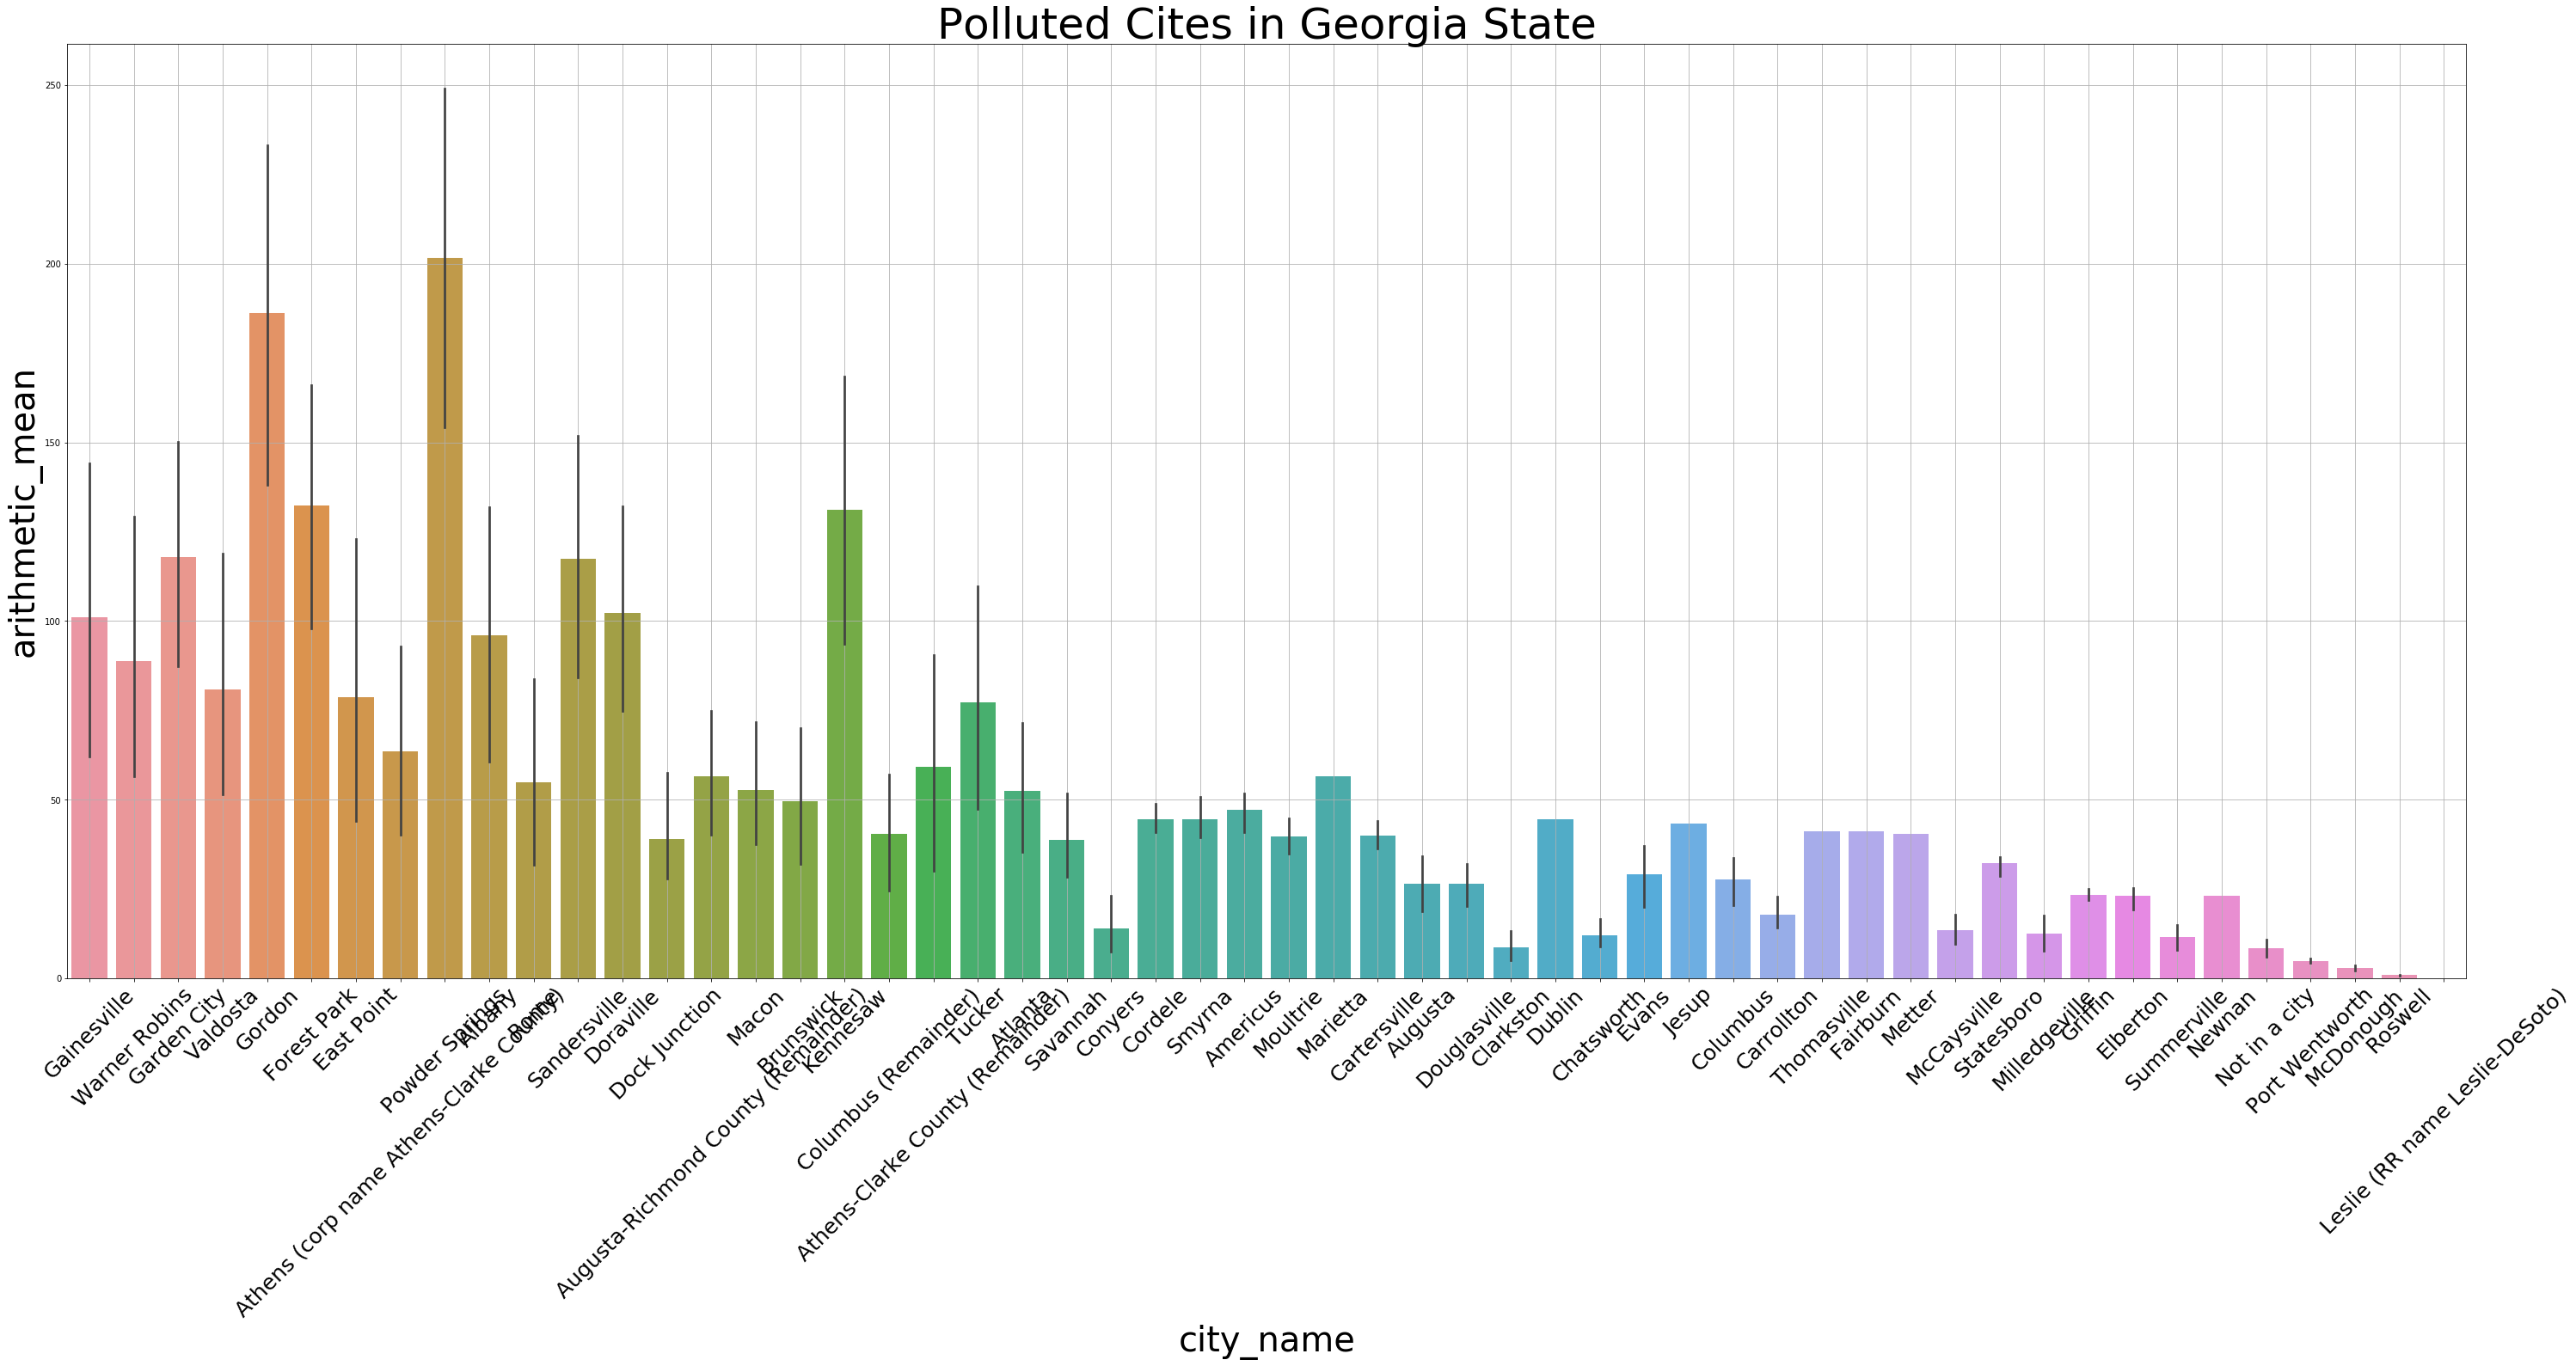

In [162]:
plt.figure(figsize=(50,20))
plt.xlabel('City Names',size=40)
plt.xticks(rotation=45,size=25)
plt.ylabel('Arithmetic mean of pollutants',size=40)
plt.title('Polluted Cites in Georgia State',size=50)
sns.barplot(city_mean.city_name, city_mean.arithmetic_mean.sort_values())
                   #If I add city_mean.city_name.sort_values(), then it is just sorting the values but with fixed labels. In this case, 
                   #So I used seaborn and it looks just right. Using plt.plot() went something wrong.
plt.grid()
plt.show()

In [ ]:
#for sns, I didn't know How to sort it by means. 

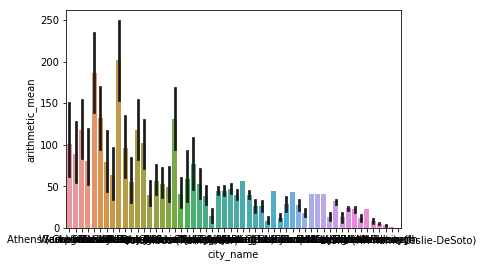

In [22]:
sns.barplot(x=city_mean.city_name, y=city_mean.arithmetic_mean, hue=None, data=None, order=None, hue_order=None,palette=None
        , saturation=0.75, errcolor='.1', errwidth=None, capsize=None, dodge=True)

The first plot: The top three polluted cities in Georgia based on arithmetic mean values are Albany, Americua, Atlanta

In [23]:
#georgia1.head(10)

In [55]:
value_count=georgia.city_name.value_counts()

In [25]:
#plt.figure(figsize=(20,20))
#plt.bar(value_count.index,value_count.city_name)
#plt.show()

In [26]:
#groupby  get meadian by cities for example

In [27]:
#georgia[georgia.year==2016].groupby(['city_name','year']).mean().sort_values('arithmetic_mean', ascending=False)

In [28]:
#city_name=georgia[georgia.city_name=='Evans','Atlanta','Summerville']  line or bar chart

In [29]:
#pollution hist  element

In [ ]:
plt.figure(figsize=(20,9))
plt.title('Overview')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.plot(georgia1[georgia1.city_name == 'Atlanta'].year, georgia1[georgia1.city_name == 'Atlanta'].arithmetic_mean,'.')
# 'city_name'=='Albany'; georgia1.sort_values('city_name')
plt.show()

In [33]:
georgia_year= georgia1[['year','arithmetic_mean','city_name']].groupby(['year','city_name']).mean().reset_index()

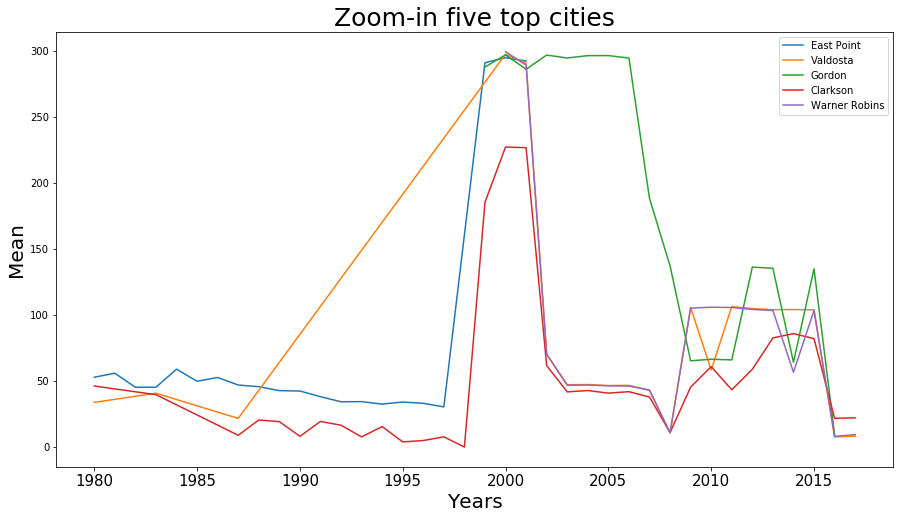

In [165]:
plt.figure(figsize=(15,8))
plt.title('Zoom-in five top cities',size=25)
plt.xlabel('Years', size=20)
plt.ylabel('Mean',size=20)
plt.xticks(size=15)
plt.plot(georgia_year[georgia_year.city_name=='East Point'].year,georgia_year[georgia_year.city_name=='East Point'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Valdosta'].year,georgia_year[georgia_year.city_name=='Valdosta'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Gordon'].year,georgia_year[georgia_year.city_name=='Gordon'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Brunswick'].year,georgia_year[georgia_year.city_name=='Brunswick'].arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Warner Robins'].year,georgia_year[georgia_year.city_name=='Elberton'].arithmetic_mean)
plt.legend(['East Point','Valdosta','Gordon','Clarkson','Elberton'])
plt.show()

In [197]:
#GROUP BARS didn't work.
fig, ax = plt.subplots()
#plt.title('Zoom-in three top cities',size=25)
#plt.xlabel('Years', size=20)
#plt.ylabel('Mean',size=20)
#plt.xticks(size=15)
x =[sns.barplot(georgia_year[georgia_year.city_name=='Americus'.year=='2017'].year,georgia_year[georgia_year.city_name=='Americus'.year=='2017'].arithmetic_mean),
    sns.barplot(georgia_year[georgia_year.city_name=='Atlanta'.year=='2017'].year,georgia_year[georgia_year.city_name=='Atlanta'.year=='2017'].arithmetic_mean)]

y=[georgia_year[georgia_year.city_name == ['Americus','Atlanta'].arithmetic_mean]

ax.bar(x, y,width=0.5,color='b')
#ax.set_ylabel('Mean',size=20)
#ax.set_title('Zoom-in five top cities',size=25)
#ax.set_xticklabels(city_mean.city_name=='Albany')
#plt.legend(['Albany','Americus','Atlanta','Augusta','Athens-Clarke County (Remainder)'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-197-25e167d640f1>, line 12)

In [228]:
georgia = df1[df1.state_name == 'Georgia']
georgia2 = georgia[['city_name', 'year', 'arithmetic_mean','parameter_name']].reset_index()
par_val_count=georgia2.parameter_name.value_counts()
georgia2.head()

,index,city_name,year,arithmetic_mean,parameter_name
0,387391,Atlanta,1980,12.018,Sulfate (TSP) STP
1,1964271,Savannah,1980,9.801,Sulfur dioxide
2,910351,Augusta-Richmond County (Remainder),1980,60.714,Suspended particulate (TSP)
3,1100776,Macon,1980,18.923,Nitrogen dioxide (NO2)
4,139198,Not in a city,1980,4.943,Sulfur dioxide


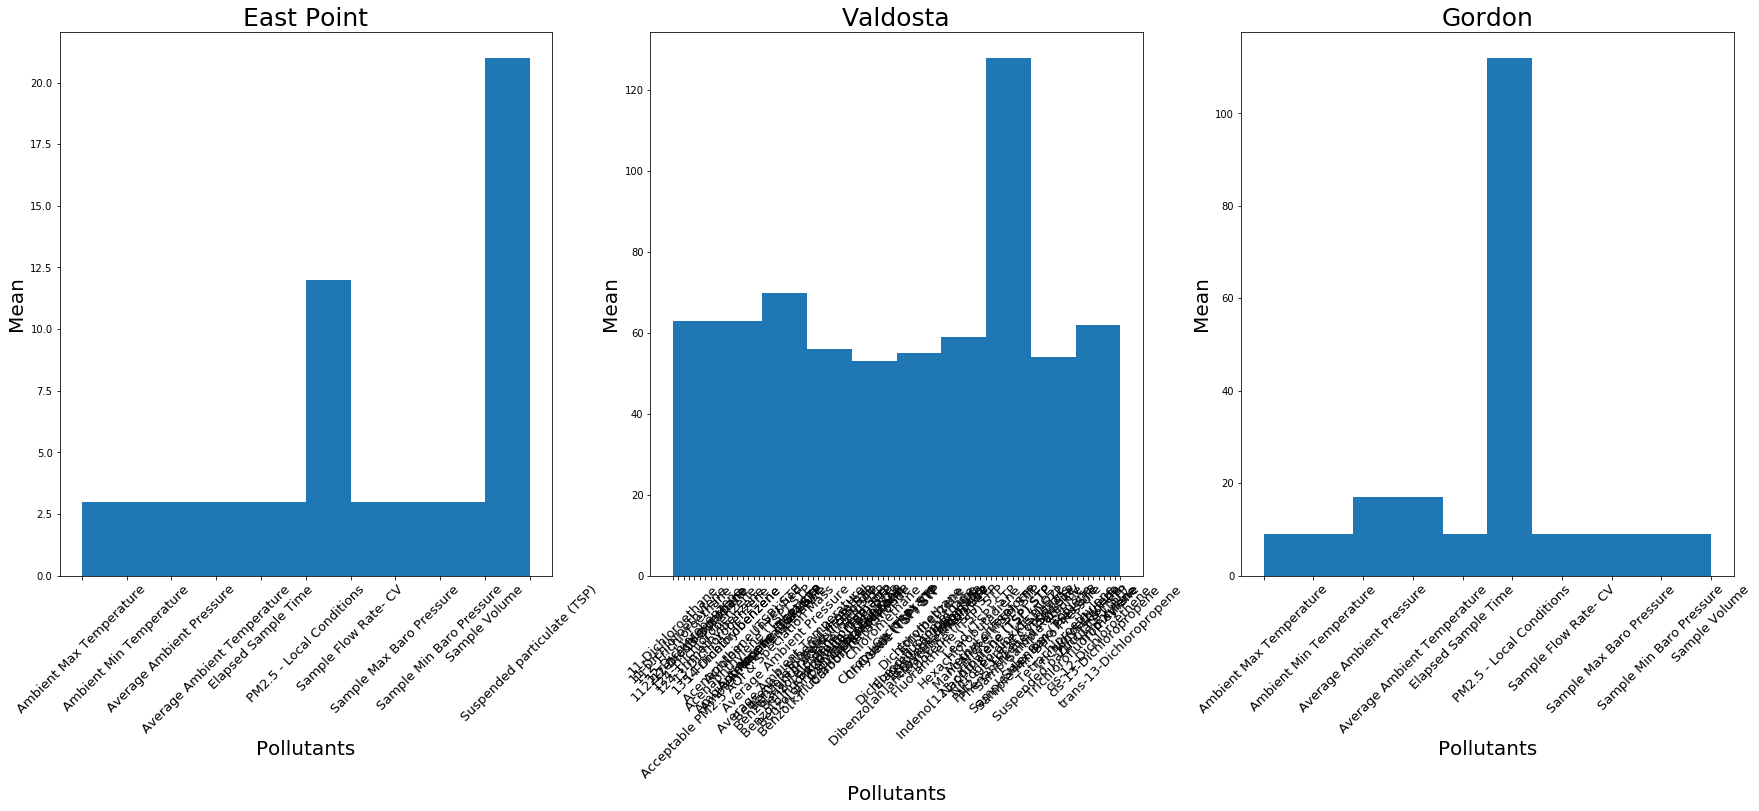

In [260]:
plt.figure(figsize=(30,10))
#plt.title('Most frequent pollutans',size=25)
#plt.xlabel('Pollutants', size=20)
#plt.ylabel('Mean',size=20)
#plt.xticks(size=30,rotation=45)


plt.subplot(1, 3, 1)
plt.hist(georgia2[georgia2.city_name=='East Point'].parameter_name) #georgia2[georgia2.city_name=='Atlanta'].arithmetic_mean)
plt.xlabel('Pollutants', size=20)
plt.ylabel('Mean',size=20)
plt.title('East Point',size=25)
plt.xticks(size=13,rotation=45)

plt.subplot(1, 3, 2)
plt.hist(georgia2[georgia2.city_name=='Valdosta'].parameter_name)
plt.xlabel('Pollutants', size=20)
plt.ylabel('Mean',size=20)
plt.title('Valdosta',size=25)
plt.xticks(size=13,rotation=45)

plt.subplot(1, 3, 3)
plt.hist(georgia2[georgia2.city_name=='Gordon'].parameter_name)
plt.xlabel('Pollutants', size=20)
plt.ylabel('Mean',size=20)
plt.title('Gordon',size=25)
plt.xticks(size=13,rotation=45)

plt.show()

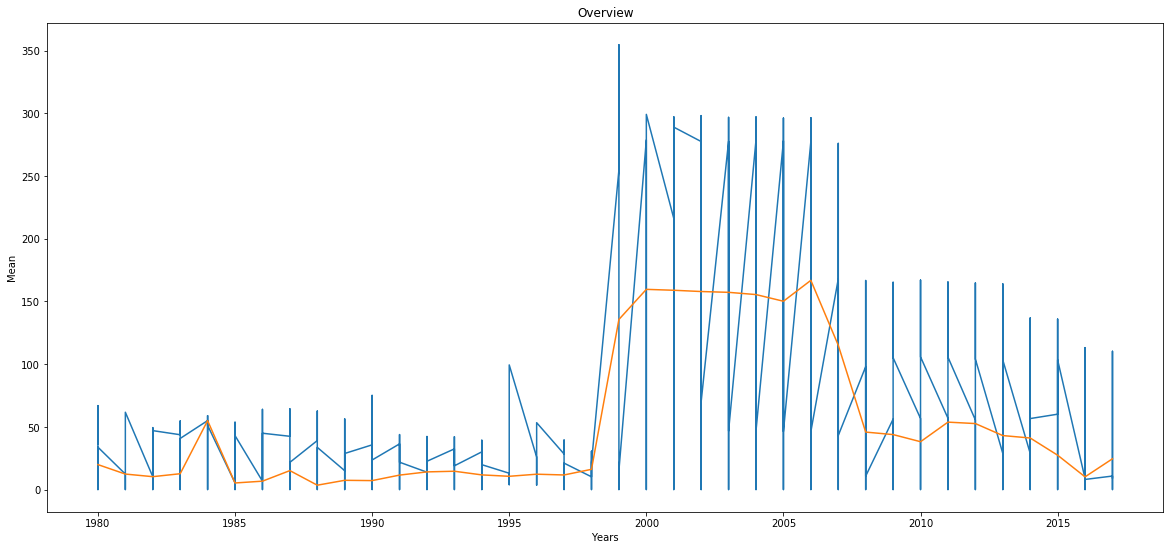

In [36]:
plt.figure(figsize=(20,9))
plt.title('Overview')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.plot(georgia_year.year, georgia_year.arithmetic_mean)
plt.plot(georgia_year[georgia_year.city_name=='Atlanta'].year, georgia_year[georgia_year.city_name=='Atlanta'].arithmetic_mean)
plt.show()

In [37]:
georgia_year[georgia_year.city_name=='Atlanta'].arithmetic_mean

3       19.937
36      12.391
47      10.312
61      12.664
85      54.995
95       5.291
105      6.724
118     15.147
149      3.524
180      7.412
211      7.180
242     11.560
274     14.122
306     14.645
337     11.725
369     10.615
401     12.281
433     11.672
463     16.174
487    135.637
516    159.638
549    158.913
583    157.905
616    157.264
649    155.475
682    150.154
715    166.823
747    115.055
779     45.861
810     43.862
839     38.181
867     53.787
895     52.650
923     43.072
948     41.141
971     27.425
994     10.179
1017    24.570
Name: arithmetic_mean, dtype: float64

In [38]:
georgia_year.columns

Index(['year', 'city_name', 'arithmetic_mean'], dtype='object')

In [39]:
# create plot
#fig, ax = plt.subplots()
#index = np.arange(n_groups)
#bar_width = 0.35
#opacity = 0.8
 
#rects1 = plt.bar(index,bar_width,
              #   alpha=opacity,
               #  color='b',
                # label='Frank')
 
#rects2 = plt.bar(index + bar_width,bar_width,
               #  alpha=opacity,
                # color='g',
                 #label='Guido')
 
# plt.xlabel('Atlanta')
#plt.ylabel('Morrow')
#plt.zlabel('Brunswick')
#plt.title('Pollutions trends before and after year 2016)
#plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
          
#plt.legend()
#plt.tight_layout()
#plt.show()

In [40]:
georgia.head()

,state_name,city_name,year,parameter_name,sample_duration,arithmetic_mean,arithmetic_standard_dev
387391,Georgia,Atlanta,1980,Sulfate (TSP) STP,24 HOUR,12.018,5.773
1964271,Georgia,Savannah,1980,Sulfur dioxide,24-HR BLK AVG,9.801,8.503
910351,Georgia,Augusta-Richmond County (Remainder),1980,Suspended particulate (TSP),24 HOUR,60.714,23.313
1100776,Georgia,Macon,1980,Nitrogen dioxide (NO2),24 HOUR,18.923,10.067
139198,Georgia,Not in a city,1980,Sulfur dioxide,1 HOUR,4.943,0.576


In [41]:
mean_2017=georgia[georgia.year==2017].groupby(['city_name','year','parameter_name']).mean().sort_values('arithmetic_mean', ascending=False)
print(mean_2017)

                                                                     arithmetic_mean  \
city_name                           year parameter_name                                
Augusta-Richmond County (Remainder) 2017 Barometric pressure                1012.894   
Columbus (Remainder)                2017 Barometric pressure                1003.272   
Conyers                             2017 Barometric pressure                 993.041   
Chatsworth                          2017 Wind Direction - Resultant          228.167   
Atlanta                             2017 Wind Direction - Resultant          226.010   
Douglasville                        2017 Wind Direction - Resultant          224.316   
Augusta-Richmond County (Remainder) 2017 Wind Direction - Resultant          205.713   
Conyers                             2017 Wind Direction - Resultant          202.015   
Savannah                            2017 Wind Direction - Resultant          199.997   
Columbus (Remainder)            

([array([  4.,  15.,   8.,  12.,  11.,  11.,   5.,   6.,  12.,   9.]),
  array([ 15.,   3.,  11.,   6.,   8.,   7.,  14.,  12.,   7.,  10.])],
 array([   0. ,   18.5,   37. ,   55.5,   74. ,   92.5,  111. ,  129.5,
         148. ,  166.5,  185. ]),
 <a list of 2 Lists of Patches objects>)

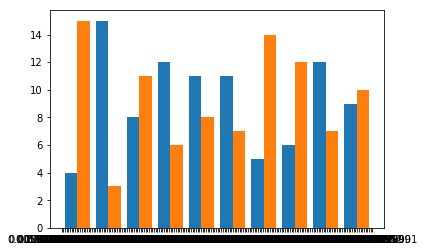

In [42]:
plt.hist(mean_2017)